In [31]:
import librosa
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt 
import librosa.display 
import pandas as pd 
from sklearn.metrics import confusion_matrix
import sys
import os
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [32]:
X, sr = librosa.load('/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_01/03-01-01-01-01-01-01.wav')

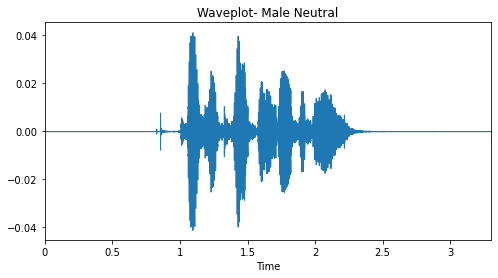

In [33]:
#display the waveplot 
plt.figure(figsize=(8,4))
librosa.display.waveplot(X, sr=sr)
plt.title('Waveplot- Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

Feature Extraction of the sound waves 


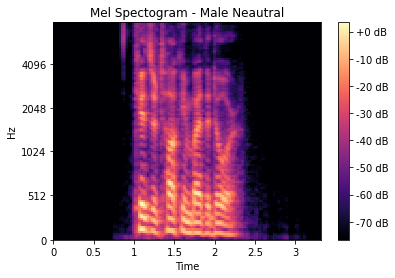

In [34]:
#Making the mel spectogram of the wave file 
spectogram = librosa.feature.melspectrogram(y=X, sr=sr, n_mels=128, fmax=8000)
spectogram = librosa.power_to_db(spectogram)

librosa.display.specshow(spectogram, y_axis='mel', fmax = 8000, x_axis='time')
plt.title('Mel Spectogram - Male Neautral')
plt.savefig('Melspec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

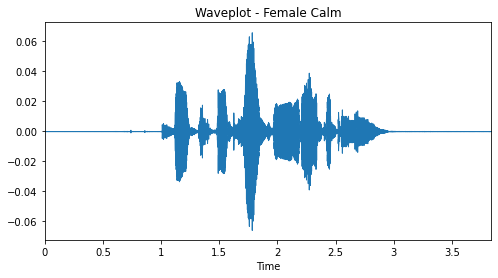

In [35]:
x, sr = librosa.load('/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_02/03-01-02-01-01-01-02.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')

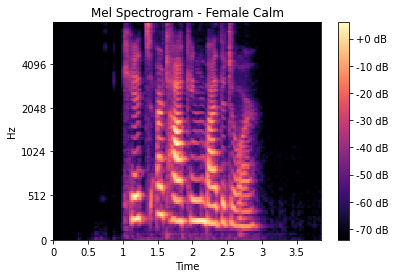

In [36]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Calm')
plt.savefig('MelSpec_FemaleCalm.png')
plt.colorbar(format='%+2.0f dB');

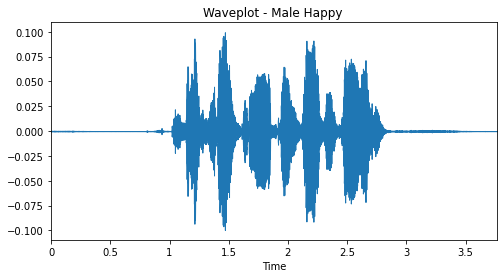

In [37]:
x, sr = librosa.load('/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_03/03-01-03-01-01-01-03.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy ')
plt.savefig('Waveplot_MaleHappy.png')

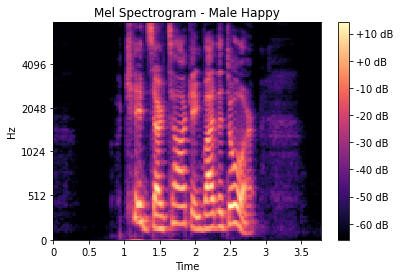

In [38]:
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x= librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.savefig('MelSpec_MaleHappy.png')
plt.colorbar(format='%+2.0f dB');

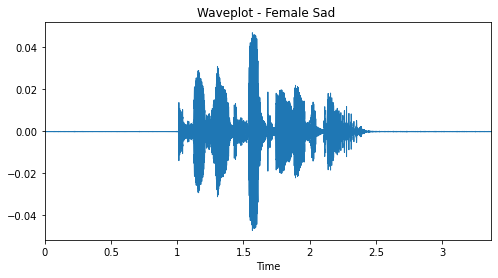

In [39]:
x, sr = librosa.load('/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_04/03-01-04-01-01-01-04.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Sad ')
plt.savefig('Waveplot_FemaleSad.png')

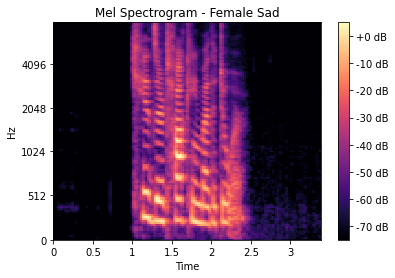

In [40]:
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Sad');
plt.savefig('MelSpec_FemaleSad.png')
plt.colorbar(format='%+2.0f dB');

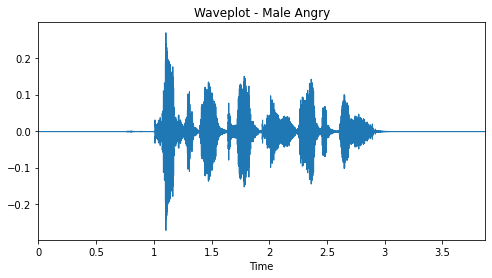

In [41]:
x,sr = librosa.load('/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_05/03-01-05-01-01-01-05.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')
plt.savefig('Waveplot_MaleAngry.png')
 

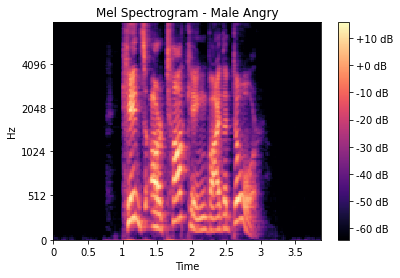

In [42]:

x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB');


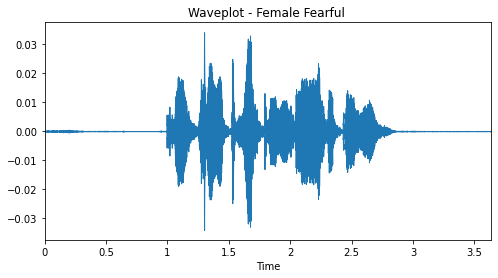

In [43]:
x,sr = librosa.load('/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_06/03-01-06-01-01-01-06.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful ')
plt.savefig('Waveplot_FemaleFearful.png')

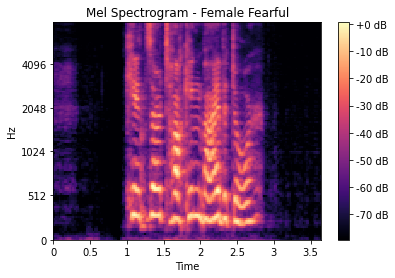

In [44]:
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.savefig('MelSpec_FemaleFearful.png')
plt.colorbar(format='%+2.0f dB');

Date Pre Processing 


Labelling Audio FIles


In [45]:
audio = "/home/divyansh/Divyansh/projects/senti_random_forest/data/"
actor_folders = os.listdir(audio)
actor_folders

['Actor_18',
 'Actor_23',
 'Actor_22',
 'Actor_12',
 'Actor_06',
 'Actor_14',
 'Actor_07',
 'Actor_16',
 'Actor_21',
 'Actor_15',
 'Actor_17',
 'Actor_11',
 'Actor_19',
 'Actor_04',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_01',
 'Actor_13',
 'Actor_24',
 'Actor_03',
 'Actor_05',
 'Actor_02',
 'Actor_20']

In [46]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [47]:
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy',4:'sad',5:'angry',6:'fear',7:'disgust', 8:'suprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender', 'emotions', 'actor']
audio_df = pd.concat([audio_df, pd.DataFrame(file_path, columns=['path'])],axis = 1)
audio_df

,gender,emotions,actor,path
0,female,happy,18,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_18/03-01-03-02-01-01-18.wav
1,female,suprise,18,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_18/03-01-08-02-02-02-18.wav
2,female,neutral,18,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_18/03-01-01-01-02-02-18.wav
3,female,disgust,18,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_18/03-01-07-02-01-01-18.wav
4,female,calm,18,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_18/03-01-02-02-01-01-18.wav
...,...,...,...,...
1435,female,disgust,20,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_20/03-01-07-01-02-01-20.wav
1436,female,suprise,20,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_20/03-01-08-02-02-01-20.wav
1437,female,happy,20,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_20/03-01-03-02-01-01-20.wav
1438,female,angry,20,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_20/03-01-05-02-02-02-20.wav


In [48]:
pd.set_option('display.max_colwidth', -1)

audio_df.sample(10)

,gender,emotions,actor,path
182,female,happy,12,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_12/03-01-03-01-02-01-12.wav
564,male,disgust,15,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_15/03-01-07-01-01-02-15.wav
1266,male,angry,5,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_05/03-01-05-01-01-01-05.wav
1178,female,neutral,24,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_24/03-01-01-01-01-01-24.wav
558,male,disgust,15,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_15/03-01-07-02-01-01-15.wav
1194,female,happy,24,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_24/03-01-03-02-01-01-24.wav
1147,female,angry,24,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_24/03-01-05-01-02-02-24.wav
453,female,fear,16,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_16/03-01-06-02-01-02-16.wav
955,male,sad,9,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_09/03-01-04-01-01-02-09.wav
575,male,calm,15,/home/divyansh/Divyansh/projects/senti_random_forest/data/Actor_15/03-01-02-02-01-01-15.wav


<AxesSubplot:>

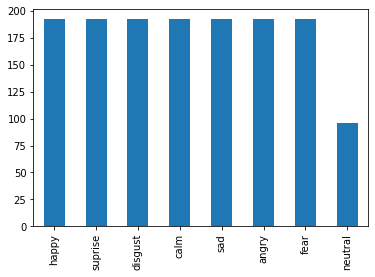

In [49]:
#distribution of the classes 

audio_df.emotions.value_counts().plot(kind = 'bar')

In [50]:
audio_df.to_csv('audio.csv')

Feature Extraction of the dataset '

In [51]:
df = pd.DataFrame(columns= ['Mel Spectogram'])
counter = 0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast', duration=3, sr= 44100, offset= 0.5)
    
    spectogram = librosa.feature.melspectrogram(y = X, sr=sample_rate, n_mels=128, fmax=8000)
    db_spec = librosa.power_to_db(spectogram)
    
    log_spectogram = np.mean(db_spec, axis= 0)
    
    df.loc[counter] = [log_spectogram]
    counter = counter+1
print(len(df))
df.head()
    
    
    

1440


,Mel Spectogram
0,"[-46.060677, -46.065086, -46.10783, -46.13144, -46.12205, -46.168167, -46.173687, -46.1646, -46.029015, -46.038387, -46.172653, -46.178257, -46.16489, -46.111855, -46.135147, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -40.9532, -31.366009, -27.745127, -27.75717, -25.538797, -23.755857, -23.821863, -22.640541, -23.097418, -23.017757, -22.787392, -24.601274, -25.229853, -22.881504, -25.451288, -32.545197, -33.772312, -30.530207, -24.571457, -20.032965, -19.51831, -21.676743, -22.728956, -23.372015, -24.578514, -23.409506, -19.559364, -20.919146, -28.362335, -32.843967, -25.690413, -21.608942, -21.571478, -18.637306, -14.730796, -13.545459, -14.668978, -16.936731, -19.486238, -18.946331, -18.360088, -20.437588, -21.909168, -19.167967, -16.786175, -15.854362, -14.721861, -15.206873, -16.764545, -17.682867, -21.376814, -25.718008, -28.598207, -30.161285, -28.417881, -24.272432, ...]"
1,"[-69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -68.72838, -67.97856, -69.14921, -69.30497, -69.35074, -69.463776, -69.463776, -69.463776, -69.40855, -69.36317, -69.2557, -68.23494, -66.81596, -64.068085, -37.345917, -30.944593, -31.928555, -31.626936, -30.454702, -30.478167, -31.929363, -32.683456, -32.643745, -31.771791, -31.041342, -30.136816, -28.923338, -28.150988, -28.247484, -30.074747, -32.372063, -35.275215, -38.052666, -41.09066, -41.740585, -37.379013, -36.891113, -38.94143, -35.277378, -30.454092, -29.796328, -31.271692, -31.212767, -31.857422, -31.742144, -31.82052, -31.829609, -30.121174, -27.521141, -27.266453, -29.191492, -31.710556, -35.383102, -38.671947, -39.89573, -41.027393, -42.241314, -43.006596, -43.972115, -43.73055, -44.22631, -44.29583, -38.896484, -34.744343, -32.53802, -32.347374, -31.675299, -30.492376, -28.908201, -27.616999, -27.864965, ...]"
2,"[-84.61124, -84.61124, -84.61124, -84.61124, -84.57513, -84.43135, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -77.35831, -73.18436, -76.820366, -83.87395, -84.528435, -84.61124, -84.61124, -83.92812, -81.74439, -83.741, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.33812, -84.372665, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -83.51796, -82.170975, -81.05847, -78.06963, -76.2603, -73.886116, -61.088634, -43.773308, -40.507362, -41.562042, -42.417053, -43.40684, -43.01341, -43.727467, -43.984688, -45.20916, -45.015804, -44.77823, -45.6047, -45.45058, -45.76135, -45.69164, -46.270786, -46.860813, -47.94041, -49.632687, -51.390144, -50.94024, -48.260956, -46.95006, -48.153233, -48.591198, -49.032314, -47.691963, -44.520412, -43.662167, -45.7388, -47.664665, -47.467823, -48.304882, -48.413563, -48.93761, -49.328148, -47.96836, -47.781116, -49.760452, -52.37591, -53.992218, -54.56569, -55.228138, -55.50826, -54.194984, -51.60425, -48.19431, -49.448982, -48.588562, -43.85573, -43.8081, -46.35083, -46.819397, -49.254692, -51.87155, ...]"
3,"[-56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.034454, -55.97461, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03

In [52]:
print(len(df))
df.head()

1440


,Mel Spectogram
0,"[-46.060677, -46.065086, -46.10783, -46.13144, -46.12205, -46.168167, -46.173687, -46.1646, -46.029015, -46.038387, -46.172653, -46.178257, -46.16489, -46.111855, -46.135147, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -40.9532, -31.366009, -27.745127, -27.75717, -25.538797, -23.755857, -23.821863, -22.640541, -23.097418, -23.017757, -22.787392, -24.601274, -25.229853, -22.881504, -25.451288, -32.545197, -33.772312, -30.530207, -24.571457, -20.032965, -19.51831, -21.676743, -22.728956, -23.372015, -24.578514, -23.409506, -19.559364, -20.919146, -28.362335, -32.843967, -25.690413, -21.608942, -21.571478, -18.637306, -14.730796, -13.545459, -14.668978, -16.936731, -19.486238, -18.946331, -18.360088, -20.437588, -21.909168, -19.167967, -16.786175, -15.854362, -14.721861, -15.206873, -16.764545, -17.682867, -21.376814, -25.718008, -28.598207, -30.161285, -28.417881, -24.272432, ...]"
1,"[-69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -68.72838, -67.97856, -69.14921, -69.30497, -69.35074, -69.463776, -69.463776, -69.463776, -69.40855, -69.36317, -69.2557, -68.23494, -66.81596, -64.068085, -37.345917, -30.944593, -31.928555, -31.626936, -30.454702, -30.478167, -31.929363, -32.683456, -32.643745, -31.771791, -31.041342, -30.136816, -28.923338, -28.150988, -28.247484, -30.074747, -32.372063, -35.275215, -38.052666, -41.09066, -41.740585, -37.379013, -36.891113, -38.94143, -35.277378, -30.454092, -29.796328, -31.271692, -31.212767, -31.857422, -31.742144, -31.82052, -31.829609, -30.121174, -27.521141, -27.266453, -29.191492, -31.710556, -35.383102, -38.671947, -39.89573, -41.027393, -42.241314, -43.006596, -43.972115, -43.73055, -44.22631, -44.29583, -38.896484, -34.744343, -32.53802, -32.347374, -31.675299, -30.492376, -28.908201, -27.616999, -27.864965, ...]"
2,"[-84.61124, -84.61124, -84.61124, -84.61124, -84.57513, -84.43135, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -77.35831, -73.18436, -76.820366, -83.87395, -84.528435, -84.61124, -84.61124, -83.92812, -81.74439, -83.741, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.33812, -84.372665, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -83.51796, -82.170975, -81.05847, -78.06963, -76.2603, -73.886116, -61.088634, -43.773308, -40.507362, -41.562042, -42.417053, -43.40684, -43.01341, -43.727467, -43.984688, -45.20916, -45.015804, -44.77823, -45.6047, -45.45058, -45.76135, -45.69164, -46.270786, -46.860813, -47.94041, -49.632687, -51.390144, -50.94024, -48.260956, -46.95006, -48.153233, -48.591198, -49.032314, -47.691963, -44.520412, -43.662167, -45.7388, -47.664665, -47.467823, -48.304882, -48.413563, -48.93761, -49.328148, -47.96836, -47.781116, -49.760452, -52.37591, -53.992218, -54.56569, -55.228138, -55.50826, -54.194984, -51.60425, -48.19431, -49.448982, -48.588562, -43.85573, -43.8081, -46.35083, -46.819397, -49.254692, -51.87155, ...]"
3,"[-56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.034454, -55.97461, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03

In [53]:
df_combined = pd.concat([audio_df, pd.DataFrame(df['Mel Spectogram'].values.tolist())], axis = 1)

In [54]:
df_conbined = df_combined.fillna(0)

In [55]:
df_combined.drop(columns='path', inplace=True)

In [56]:
df_combined.head()

,gender,emotions,actor,0,1,2,3,4,5,6,...,249,250,251,252,253,254,255,256,257,258
0,female,happy,18,-46.060677,-46.065086,-46.107830,-46.131439,-46.122051,-46.168167,-46.173687,...,-46.178257,-46.178257,-46.178257,-46.178257,-46.178257,-46.178257,-46.178257,-46.178257,-46.178257,-46.178257
1,female,suprise,18,-69.463776,-69.463776,-69.463776,-69.463776,-69.463776,-69.463776,-69.463776,...,-69.463776,-69.463776,-69.463776,-69.463776,-69.463776,-69.463776,-69.463776,-69.463776,-69.463776,-69.463776
2,female,neutral,18,-84.611237,-84.611237,-84.611237,-84.611237,-84.575127,-84.431351,-84.611237,...,-84.611237,-84.611237,-84.611237,-84.611237,-84.611237,-84.611237,-84.525650,NaN,NaN,NaN
3,female,disgust,18,-56.038460,-56.038460,-56.038460,-56.038460,-56.038460,-56.038460,-56.038460,...,-24.586273,-24.407082,-23.927998,-22.949596,-21.407307,-21.849970,-21.308496,-21.342438,-19.861801,-16.961920
4,female,calm,18,-77.612885,-77.612885,-77.612885,-77.612885,-77.612885,-77.612885,-77.612885,...,-77.612885,-77.612885,-77.612885,-77.612885,-77.612885,-77.612885,-77.612885,-77.612885,-77.612885,-77.612885


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [58]:
train,test = train_test_split(df_combined, test_size=0.2, random_state = 0, stratify = df_combined[['emotions', 'gender', 'actor']])

In [59]:
X_train = train.iloc[:,3:]
y_train = train.iloc[:,:2].drop(columns = ['gender'])
print(X_train.shape)

(1152, 259)


In [60]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(288, 259)


In [61]:
#Normalize the data

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [62]:
X_train = np.array(X_train)
std = np.array(std)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [64]:
#one hot encoding for transforming the data to numbers 
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_train = to_categorical(y_train)

In [65]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
y_test = lb.fit_transform(y_test)
y_test = to_categorical(y_test)

In [67]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
print(y_test[0:10])

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


In [69]:
print(y_train[0:10])

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]


In [70]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'suprise']


In [71]:
lb

LabelEncoder()

In [72]:
df

,Mel Spectogram
0,"[-46.060677, -46.065086, -46.10783, -46.13144, -46.12205, -46.168167, -46.173687, -46.1646, -46.029015, -46.038387, -46.172653, -46.178257, -46.16489, -46.111855, -46.135147, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -46.178257, -40.9532, -31.366009, -27.745127, -27.75717, -25.538797, -23.755857, -23.821863, -22.640541, -23.097418, -23.017757, -22.787392, -24.601274, -25.229853, -22.881504, -25.451288, -32.545197, -33.772312, -30.530207, -24.571457, -20.032965, -19.51831, -21.676743, -22.728956, -23.372015, -24.578514, -23.409506, -19.559364, -20.919146, -28.362335, -32.843967, -25.690413, -21.608942, -21.571478, -18.637306, -14.730796, -13.545459, -14.668978, -16.936731, -19.486238, -18.946331, -18.360088, -20.437588, -21.909168, -19.167967, -16.786175, -15.854362, -14.721861, -15.206873, -16.764545, -17.682867, -21.376814, -25.718008, -28.598207, -30.161285, -28.417881, -24.272432, ...]"
1,"[-69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -69.463776, -68.72838, -67.97856, -69.14921, -69.30497, -69.35074, -69.463776, -69.463776, -69.463776, -69.40855, -69.36317, -69.2557, -68.23494, -66.81596, -64.068085, -37.345917, -30.944593, -31.928555, -31.626936, -30.454702, -30.478167, -31.929363, -32.683456, -32.643745, -31.771791, -31.041342, -30.136816, -28.923338, -28.150988, -28.247484, -30.074747, -32.372063, -35.275215, -38.052666, -41.09066, -41.740585, -37.379013, -36.891113, -38.94143, -35.277378, -30.454092, -29.796328, -31.271692, -31.212767, -31.857422, -31.742144, -31.82052, -31.829609, -30.121174, -27.521141, -27.266453, -29.191492, -31.710556, -35.383102, -38.671947, -39.89573, -41.027393, -42.241314, -43.006596, -43.972115, -43.73055, -44.22631, -44.29583, -38.896484, -34.744343, -32.53802, -32.347374, -31.675299, -30.492376, -28.908201, -27.616999, -27.864965, ...]"
2,"[-84.61124, -84.61124, -84.61124, -84.61124, -84.57513, -84.43135, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -77.35831, -73.18436, -76.820366, -83.87395, -84.528435, -84.61124, -84.61124, -83.92812, -81.74439, -83.741, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -84.33812, -84.372665, -84.61124, -84.61124, -84.61124, -84.61124, -84.61124, -83.51796, -82.170975, -81.05847, -78.06963, -76.2603, -73.886116, -61.088634, -43.773308, -40.507362, -41.562042, -42.417053, -43.40684, -43.01341, -43.727467, -43.984688, -45.20916, -45.015804, -44.77823, -45.6047, -45.45058, -45.76135, -45.69164, -46.270786, -46.860813, -47.94041, -49.632687, -51.390144, -50.94024, -48.260956, -46.95006, -48.153233, -48.591198, -49.032314, -47.691963, -44.520412, -43.662167, -45.7388, -47.664665, -47.467823, -48.304882, -48.413563, -48.93761, -49.328148, -47.96836, -47.781116, -49.760452, -52.37591, -53.992218, -54.56569, -55.228138, -55.50826, -54.194984, -51.60425, -48.19431, -49.448982, -48.588562, -43.85573, -43.8081, -46.35083, -46.819397, -49.254692, -51.87155, ...]"
3,"[-56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.034454, -55.97461, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03846, -56.03

In [73]:
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(1152, 259, 1)

In [74]:
X_test = 

NameError: name 'X_te' is not defined